In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [75]:
data = pd.read_csv("Test Dataset.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


- Define the features and the target values

In [76]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

- We need to encode the categorical data (State [index 3] in this case)

In [77]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [3])], remainder="passthrough")
x = np.array(ct.fit_transform(x))


- Split the dataset to train and test data with a test size of 20% of the initial dataset

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [79]:
x_test

array([[0.0, 1.0, 0.0, 66051.52, 182645.56, 118148.2],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 1.0, 0.0, 73994.56, 122782.75, 303319.26],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

- Fit and train the model

In [80]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

- Predict the test dataset and show the prediction next to the test poredictions

In [81]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2) #show values with 2 decimal precision
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


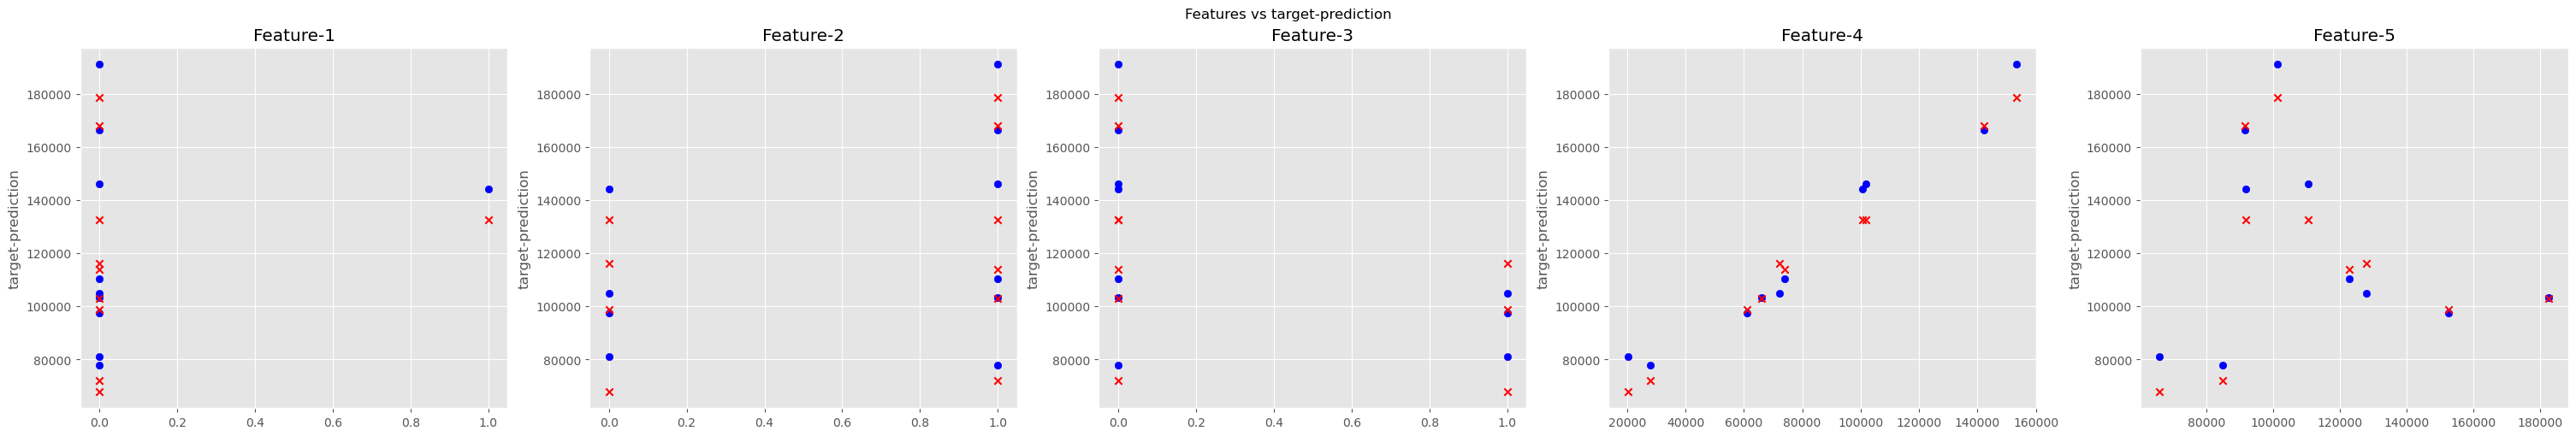

In [90]:
plt.style.use("ggplot")
fig, ax = plt.subplots(nrows=1, ncols=x_test.shape[1]-1, constrained_layout=True, figsize=(30,5))
fig.suptitle("Features vs target-prediction")
for n in range(x_test.shape[1]-1):
    ax[n].scatter(x=x_test[:, n], y=y_test, marker="o", c="b")
    ax[n].scatter(x=x_test[:, n], y=y_pred, marker="x", c="r")
    ax[n].set_title(f"Feature-{n + 1}")
    ax[n].set_ylabel("target-prediction")
    
plt.show()